https://medium.com/@h4k1m0u/clustering-a-satellite-image-with-scikit-learn-14adb2ca3790  
http://www.acgeospatial.co.uk/k-means-sentinel-2-python/  


Read image with GDAL wrapper in a Numpy array and extract band 

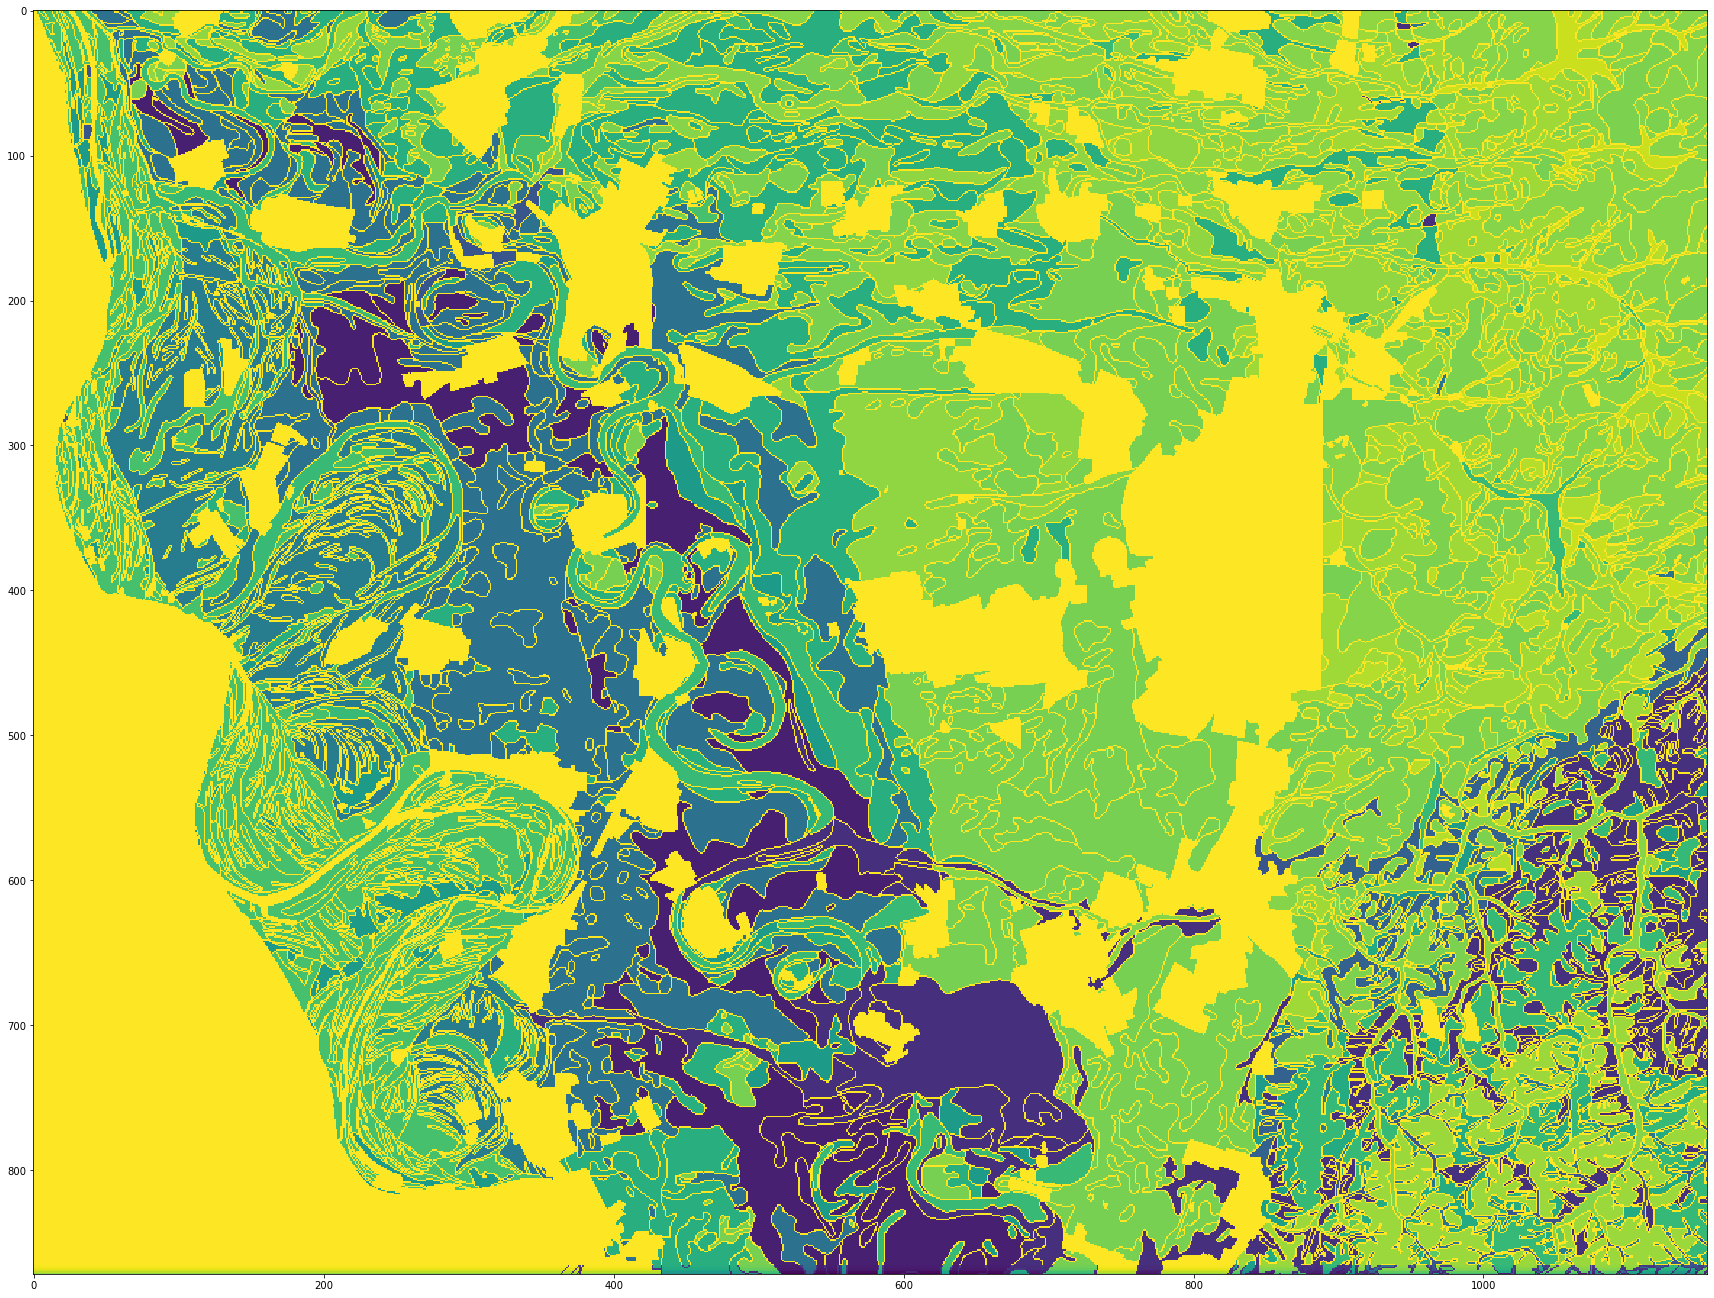

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import cluster
import numpy as np
from osgeo import gdal, gdal_array

dataset = gdal.Open('soil_plank_test.tiff')
band = dataset.GetRasterBand(2)
img = band.ReadAsArray()

img_1d = img.reshape((-1,1))
img_1d = np.where(img_1d==150, 255, img_1d) 

k_means = cluster.KMeans(n_clusters=9)
k_means.fit(img_1d)

#Assign labels
cluster = k_means.labels_
#reshape to original dimensions
cluster = img_1d.reshape(img.shape)

plt.figure(figsize=(30,30))
plt.imshow(cluster)
plt.show()



In [ ]:
dataset = gdal.Open('soil_plank_test.tiff')
band = dataset.GetRasterBand(1)

img = band.ReadAsArray()
print(img.shape)
print(img)
#reshape from original 2D (width x height) to a vector ([[x1][x2]...[xn]]) where xi is the intensity of each pixel
X = img.reshape((-1,1))
print(X)
#Initialize the classifier with number of clusters as input
kmeans = KMeans(n_clusters=11,random_state=0).fit(X)
kmeans.labels_
print(kmeans)
kmeans = kmeans.predict()
print(kmeans)





In [ ]:

#reshape from vector to 2D array 
X_clustered = k_means.labels_
X_clustered = X_clustered.reshape(img.shape)

#Create Geotiff and save the clustered image array as and individual band on it
driver = gdal.GetDriverByName('GTiff')
x_size = np.array.shape[1]
y_size = np.array.shape[0]
dataset = driver.Create(filename, x_size, y_size, eType=gdal.GDT_Float32)
_ = dataset.GetRasterBand(1).WriteArray(X_clustered)


In [ ]:

#For clustering we need to convert it into two-dimensional array 
x, y  = img.shape
print(x,y)
kmeans_cluster = cluster.KMeans(n_clusters=9)
kmeans_cluster.fit(img)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_labels = kmeans_cluster.labels_

plt.figure(figsize=(20,15))
plt.imshow(cluster_centers[cluster_labels].reshape(x,y))

In [ ]:
driver = gdal.GetDriverByName('GTiff')
x_size = img.shape[1]
y_size = img.shape[0]
dataset = driver.Create('lalilu.tiff', x_size, y_size, eType=gdal.GDT_Float32)
file = dataset.GetRasterBand(1).WriteArray(X_clustered)

image= plt.imread(r'C:\Users\USER\Desktop\master-thesis-master\lalilu.tiff')
plt.figure(figsize=(20,15))
plt.imshow(file)